In [9]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn import tree

In [10]:
iris = load_iris()
x = pd.DataFrame(iris.data[:, :], columns = iris.feature_names[:])
y = pd.DataFrame(iris.target, columns =["Species"])

In [19]:
print(x.shape)
print(y.shape)

(150, 4)
(150, 1)


In [12]:
print(x[1:5])
print(y[1:5])

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
   Species
1        0
2        0
3        0
4        0


In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.9, random_state=42)

In [17]:
print(x_train.head(), x_test.head())
print(y_train.head(), y_test.head())

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
52                 6.9               3.1                4.9               1.5
130                7.4               2.8                6.1               1.9
103                6.3               2.9                5.6               1.8
99                 5.7               2.8                4.1               1.3
116                6.5               3.0                5.5               1.8      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
73                 6.1               2.8                4.7               1.2
18                 5.7               3.8                1.7               0.3
118                7.7               2.6                6.9               2.3
78                 6.0               2.9                4.5               1.5
76                 6.8               2.8                4.8               1.4
     Species
52         1
130        2
103        2
99         1

In [7]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(15, 4)
(15, 1)
(135, 4)
(135, 1)


In [8]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
#clf = clf.fit(x, y)

[Text(468.72, 634.1999999999999, 'petal width (cm) <= 1.6\ngini = 0.604\nsamples = 15\nvalue = [2, 6, 7]\nclass = virginica'),
 Text(312.48, 380.52, 'petal length (cm) <= 2.85\ngini = 0.375\nsamples = 8\nvalue = [2, 6, 0]\nclass = versicolor'),
 Text(156.24, 126.84000000000003, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]\nclass = setosa'),
 Text(468.72, 126.84000000000003, 'gini = 0.0\nsamples = 6\nvalue = [0, 6, 0]\nclass = versicolor'),
 Text(624.96, 380.52, 'gini = 0.0\nsamples = 7\nvalue = [0, 0, 7]\nclass = virginica')]

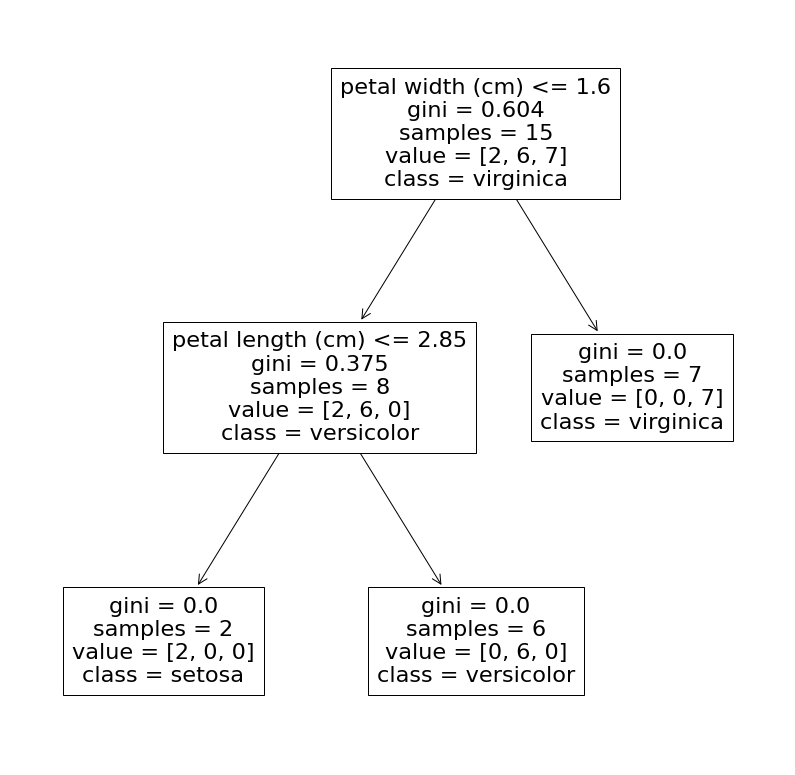

In [41]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(14, 14))
tree.plot_tree(clf, feature_names=list(x.columns), class_names=iris.target_names)

In [42]:
# [sepal length, sepal width, petal length, petal width
iris.target_names[int(clf.predict([[2, 5, 1, 3]]))]

/home/wiktor/.local/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


'virginica'

In [43]:
# Prosze zaproponowac takie dwa zestawy cech, aby zostały zakwalifikowane przez drzewo do klas 'virginica' i 'versicolor'

In [44]:
# Maksymalna głębokość drzewa równa 2

In [45]:
clf_max_depth_equal_to_2 = tree.DecisionTreeClassifier(max_depth=2)
clf_max_depth_equal_to_2 = clf_max_depth_equal_to_2.fit(x_train, y_train)
# clf_max_depth_equal_to_2 = clf_max_depth_equal_to_2.fit(x, y)

[Text(468.72, 634.1999999999999, 'petal width (cm) <= 1.6\ngini = 0.604\nsamples = 15\nvalue = [2, 6, 7]\nclass = virginica'),
 Text(312.48, 380.52, 'petal length (cm) <= 2.85\ngini = 0.375\nsamples = 8\nvalue = [2, 6, 0]\nclass = versicolor'),
 Text(156.24, 126.84000000000003, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]\nclass = setosa'),
 Text(468.72, 126.84000000000003, 'gini = 0.0\nsamples = 6\nvalue = [0, 6, 0]\nclass = versicolor'),
 Text(624.96, 380.52, 'gini = 0.0\nsamples = 7\nvalue = [0, 0, 7]\nclass = virginica')]

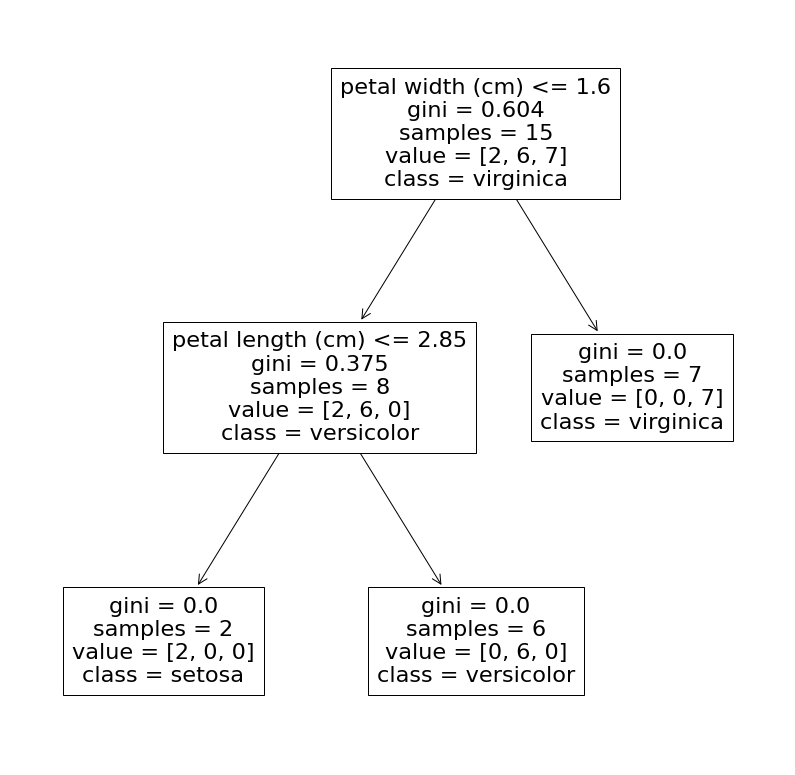

In [46]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(14, 14))
tree.plot_tree(clf_max_depth_equal_to_2, feature_names=list(x.columns), class_names=iris.target_names)

In [47]:
# Ewaluacja dwóch wariantów drzew

In [48]:
y_test_pred_from_clf = clf.predict(x_test)
y_test_pred_from_clf_max_depth_equal_to_2 = clf_max_depth_equal_to_2.predict(x_test)

In [49]:
from sklearn.metrics import accuracy_score

In [50]:
print(accuracy_score(y_test, y_test_pred_from_clf))
print(accuracy_score(y_test, y_test_pred_from_clf_max_depth_equal_to_2))

0.9555555555555556
0.9555555555555556


In [51]:
# Zadanie
# Proszę pobrać dowolny zbiór danych ze strony https://archive.ics.uci.edu/ml/index.php
# Następnie proszę podzielić zbiór na dane trenujące i testujące, wytrenować 5 modeli drzew decyzyjnych z różną
# maksymalną głębokością, porównać wyniki. Proszę o sporządzenie sprawozdania z wnioskami.

In [52]:
import pandas as pd 
data = pd.read_csv("glass.data", header=None, index_col=0) 
print(data.head())
x = pd.DataFrame(data.values[:,0:9], columns =['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe'])
y = pd.DataFrame(data.values[:,9], columns =['Type'])
print(x.shape)
print(y.shape)
print(x[1:5])
print(y[1:5])

        1      2     3     4      5     6     7    8    9   10
0                                                             
1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0   1
2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0   1
3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0   1
4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0   1
5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0   1
(214, 9)
(214, 1)
        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0
   Type
1   1.0
2   1.0
3   1.0
4   1.0
